In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


Text(0, 0.5, 'output vol')

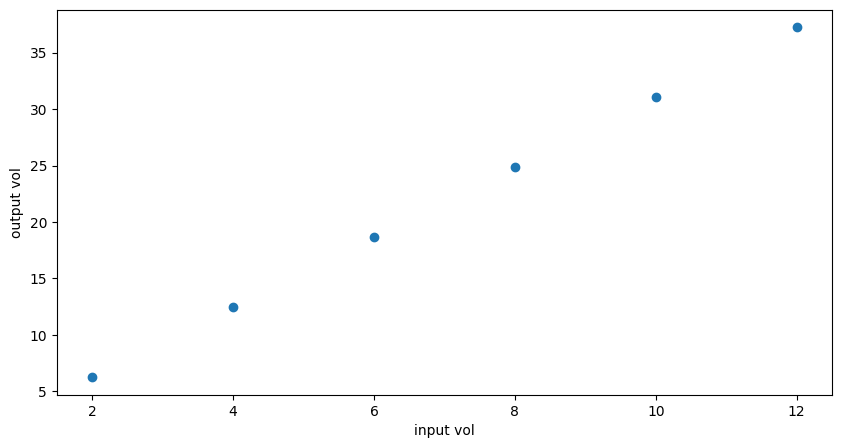

In [5]:
data = np.loadtxt('data/manual.txt', skiprows=1)

# Data
I = data[:, 0]
B = data[:, 1]
V = data[:, 2]

plt.figure(figsize=(10, 5))
plt.subplot
plt.plot(I, B, 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')



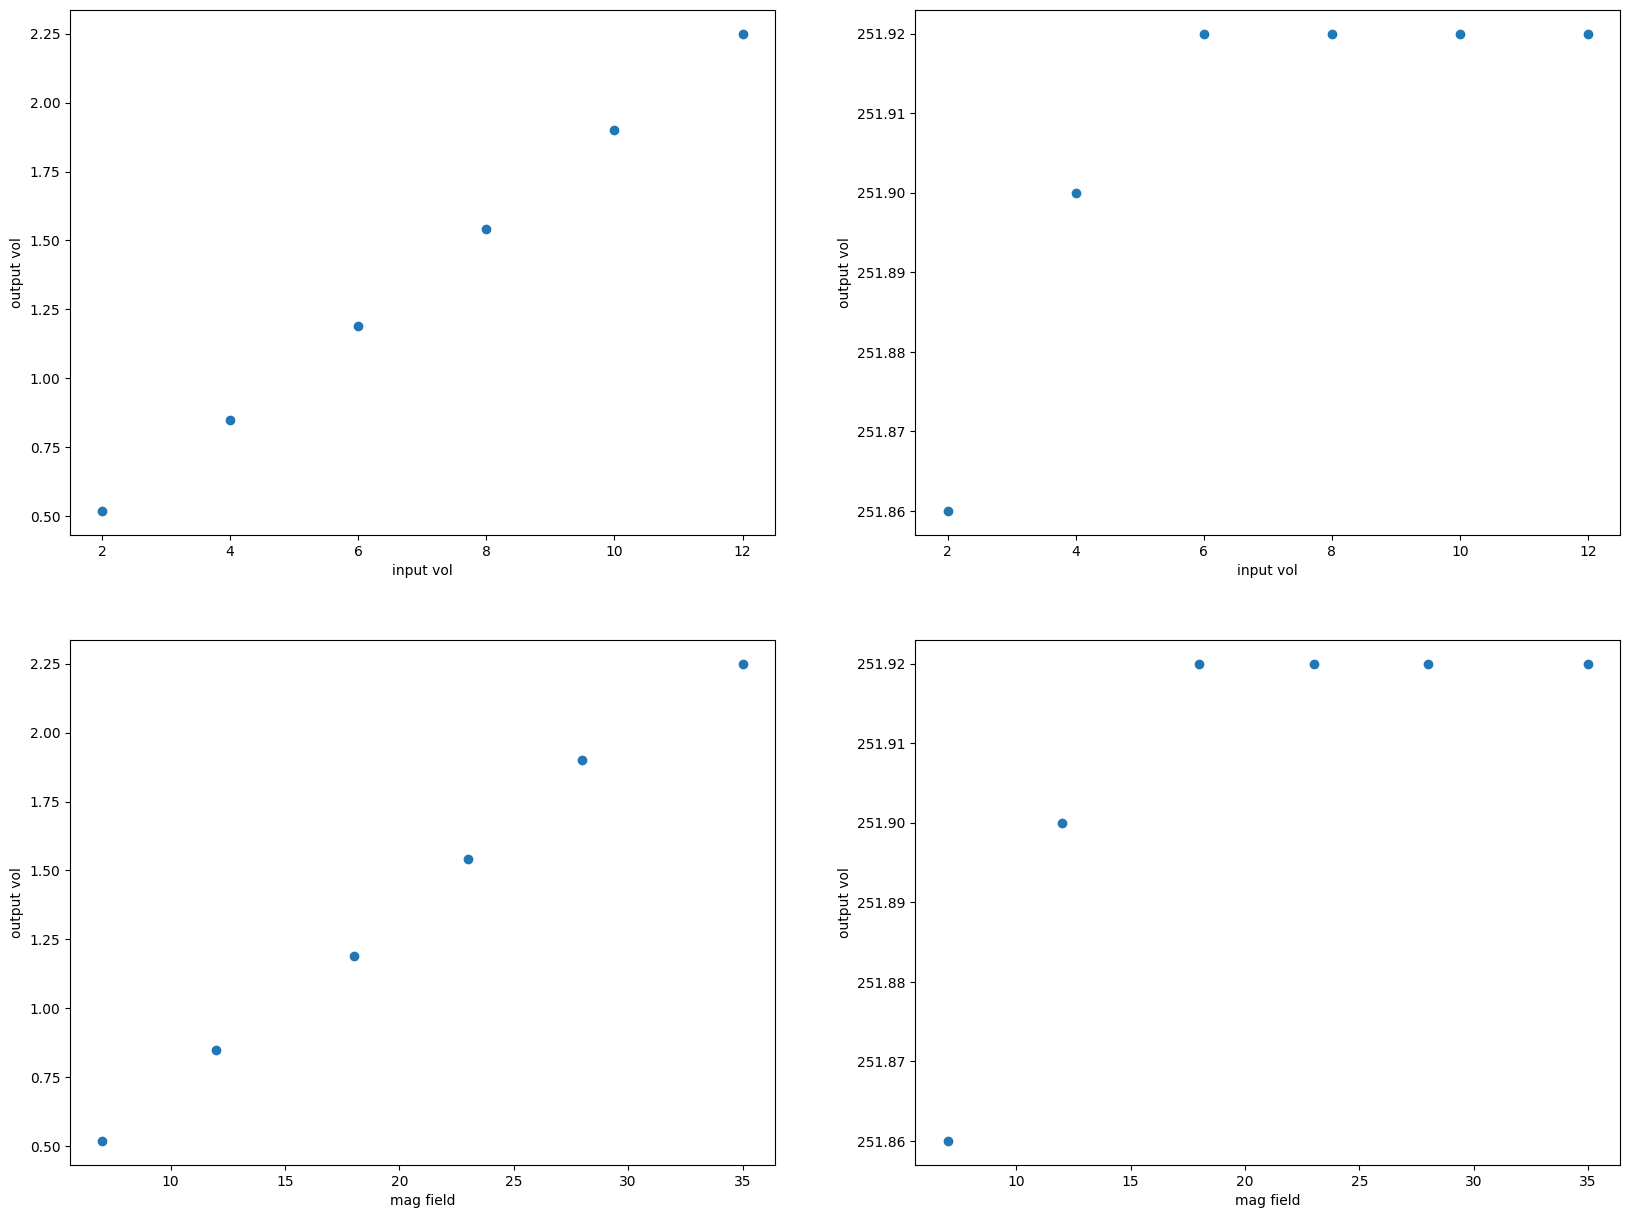

In [9]:
data = np.loadtxt('data/hall_mag_manual.txt', skiprows=3)
data_long = np.loadtxt('data/long_mag_manual.txt', skiprows=3)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(data[:, 0], data[:, 1], 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.subplot(2,2,2)
plt.plot(data_long[:, 0], data_long[:, 1], 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.subplot(2,2,3)
plt.plot(data[:, 3], data[:, 1], 'o', label='Data')
plt.xlabel('mag field')
plt.ylabel('output vol')
plt.subplot(2,2,4)
plt.plot(data_long[:, 3], data_long[:, 1], 'o', label='Data')
plt.xlabel('mag field')
plt.ylabel('output vol')
plt.show()

